# RANDOM FOREST.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter #high performance contains data types
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("car_evaluation.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.shape

(1728, 7)

In [13]:
data.corr()

,doors,persons
doors,1.0,0.0
persons,0.0,1.0


In [5]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

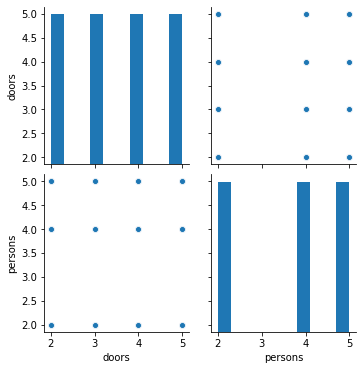

In [16]:
sb.pairplot(data)

In [9]:
model=RandomForestClassifier(random_state=5)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [3]:
Counter(data.outcome) #	dict subclass for counting hashable objects

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

In [6]:
X=data.iloc[:,:-1]
y=data.outcome
X.head(3)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high


In [7]:
enc=LabelEncoder() #converting labels into numeric form so that machine can read easily
X.buying=enc.fit_transform(X.buying)
X.maint=enc.fit_transform(X.maint)
X.lug_boot=enc.fit_transform(X.lug_boot)
X.safety=enc.fit_transform(X.safety)
X.head(3)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [10]:
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9953703703703703

In [11]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)


Counter({'unacc': 307, 'acc': 84, 'vgood': 22, 'good': 19})


col_0,acc,good,unacc,vgood
outcome,,,,
acc,83,1,0,0
good,1,18,0,0
unacc,0,0,307,0
vgood,0,0,0,22


In [12]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 1.000000
Accuracy on test set: 0.995370
